In [4]:
import time

import numpy as np
import pandas as pd

from recycle_module_py import *

import seaborn as sns
%matplotlib inline

C:\Anaconda3\envs\py36_32\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Anaconda3\envs\py36_32\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Anaconda3\envs\py36_32\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
kwargs = {
    # model parameters
    'n_mun': 5,
    'mul_com': 4,

    'campaign_bud_prop': 0.1,
    'final_target': 0.5,
    
    # municipality parameters
    'target_mean': 0.1,
    'amb_mean': 0.3,
    'percep_range': 0.1,
    'know_range': 0.1,
    
    # company parameters
    'technology': 0.2,
    'tech_std': 0.1,
    'cap_mean': 600,
    'cap_std': 300,
}

In [3]:
model = Model(**kwargs)
model.setup()
for i in range(240):
    model.update()

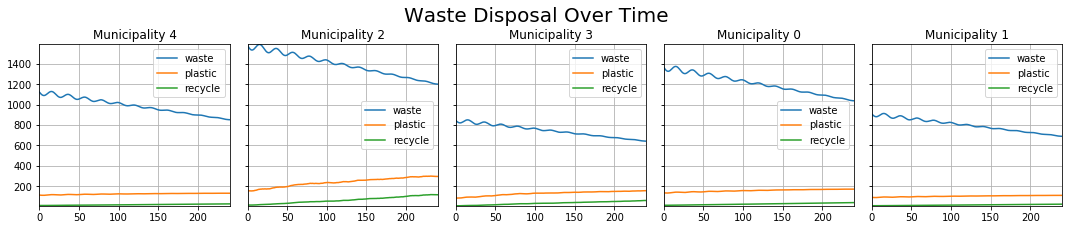

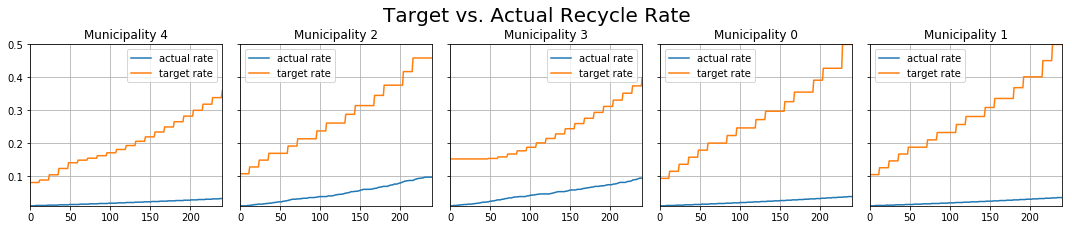

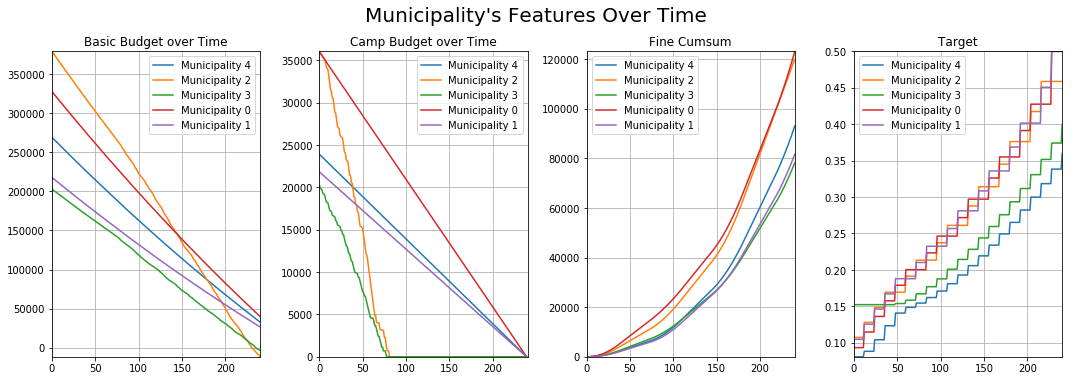

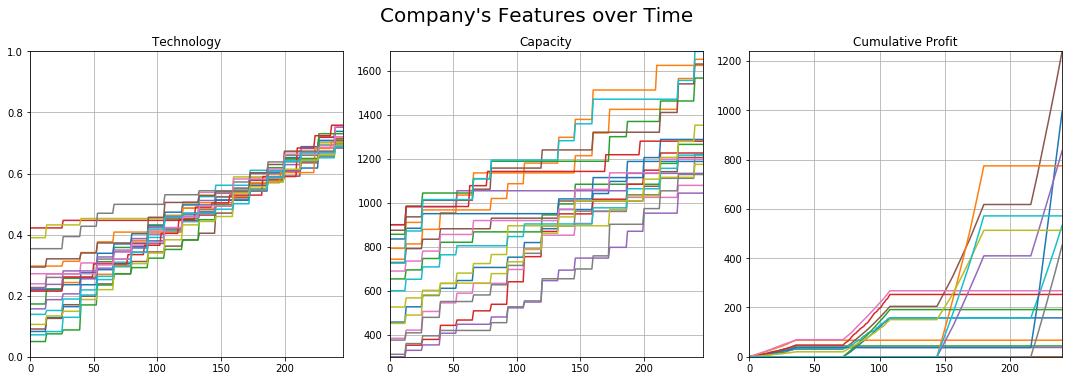

In [4]:
model.plot_waste()
model.plot_target()

model.plot_municipality()
model.plot_company()

### KPI

In [5]:
# Fraction of Municipalities which meet the target
target_met_frac = pd.Series([mun.target_met for mun in model.mun_list]).value_counts(True)
if True not in target_met_frac.index:
    target_met_frac = 0
else:
    target_met_frac = pd.Series([mun.target_met for mun in model.mun_list]).value_counts(True)[True]
target_met_frac

0

In [6]:
# Fraction of Municipalities which has no budget left
no_budget_frac = pd.Series([mun.no_budget for mun in model.mun_list]).value_counts(True)
if True not in no_budget_frac.index:
    no_budget_frac = 0
else:
    no_budget_frac = pd.Series([mun.no_budget for mun in model.mun_list]).value_counts(True)[True]
no_budget_frac

0.4

In [7]:
# avg time period that municipalities paid fine
arr_fine_period = np.array([len(mun.fine_history) for mun in model.mun_list])
avg_fine_period = arr_fine_period.mean()
avg_fine_period

175.2

In [8]:
# Fine payment divided by populations (per Households)
np.array([mun.account_book[2].sum() / mun.n_pop for mun in model.mun_list]).mean()

287.81753897926905

In [9]:
# 4. time for technology to converge
df = pd.DataFrame()
for com in model.com_list:
    df[com.unique_id] = com.tech_arr
std = df.apply(lambda x: x.std(), axis = 1)
std_conv = 0.03
if std.min() > 0.03:
    time_conv = 240
else:
    time_conv = std.where(std < std_conv).dropna().head(1).index[0]
time_conv

146

In [10]:
# std of cumulative profits
np.array([com.profits[1].cumsum() for com in model.com_list]).mean(axis=1).std()

90.61015028922593

### KPI as a Function <code>recycle_model()</code>

In [11]:
for i in range(10):
    print(recycle_model())

(1.0, 1.0, 150.0, 399.84902035505183, 151, 188.29331170641072)
(0.5, 0.5, 150.0, 240.03235077842243, 173, 318.39267681587944)
(0.5, 0.5, 204.0, 253.24461278745474, 40, 345.62307016196854)
(1.0, 0.5, 150.0, 373.8890871993128, 66, 86.0792870351469)
(1.0, 1.0, 132.0, 370.6033000061154, 240, 245.18541943073674)
(1.0, 0.5, 186.0, 257.59972447724465, 143, 375.3685852977417)
(1.0, 1.0, 204.0, 145.8628043478261, 120, 565.4917607932206)
(0.5, 0.5, 150.0, 113.09566116636529, 133, 407.7337007264755)
(0.5, 0, 186.0, 434.18402632573384, 120, 158.3157330331621)
(0, 0, 150.0, 292.9491682437227, 227, 183.7055991566414)


### Experiment

In [2]:
from ema_workbench import ema_logging, perform_experiments, MultiprocessingEvaluator
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench.util import save_results, load_results

In [10]:
experiment_model = set_model()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 200 scenarios * 10 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1400 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 1800 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


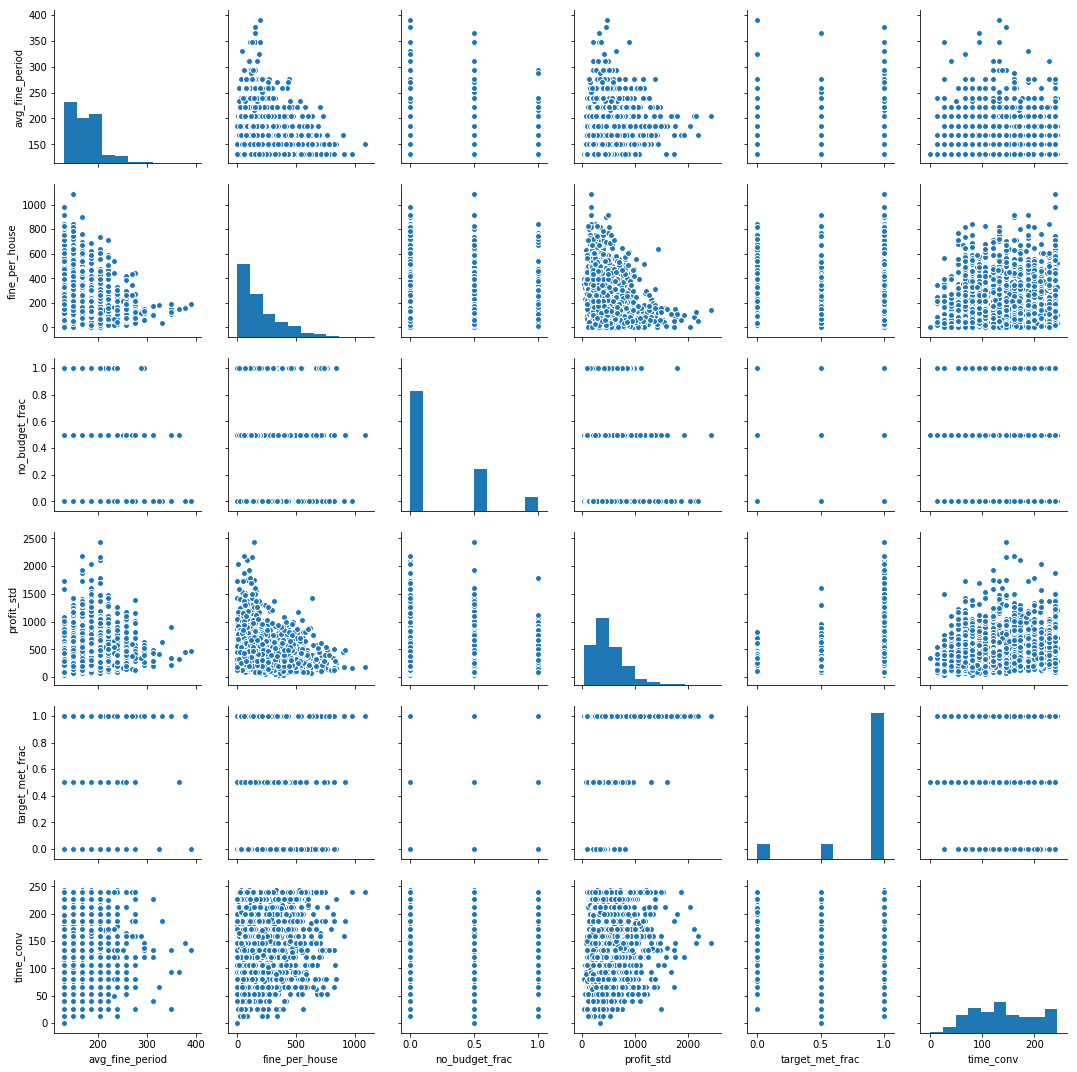

In [14]:
n_scenarios = 200
n_policies = 10

with MultiprocessingEvaluator(experiment_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, n_policies)
save_results(results, "results.tar.gz")

In [6]:
# results = load_results("results.tar.gz")
# experiments, outcomes = results_df(results)

In [11]:
inputs = experiments[list(experiment_model.uncertainties.keys())]
solutions = experiments[list(experiment_model.levers.keys())]

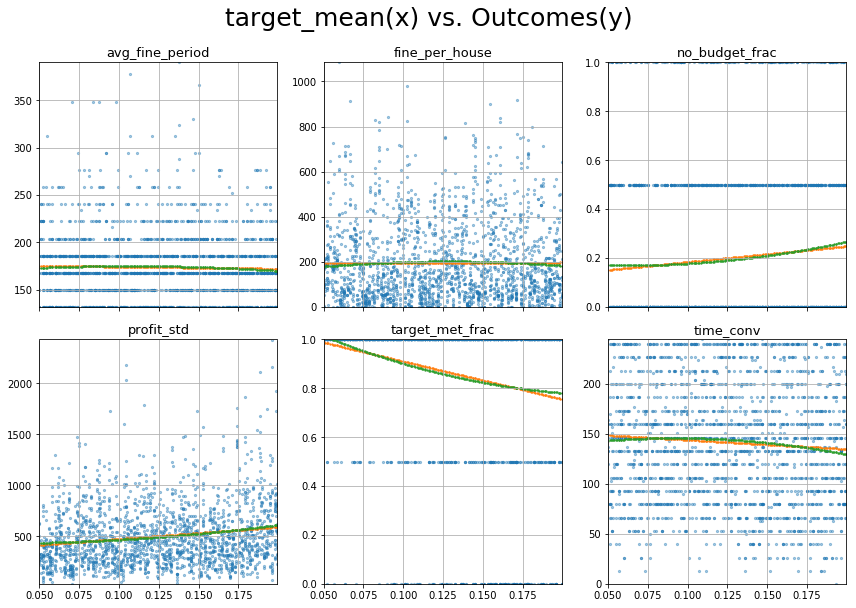

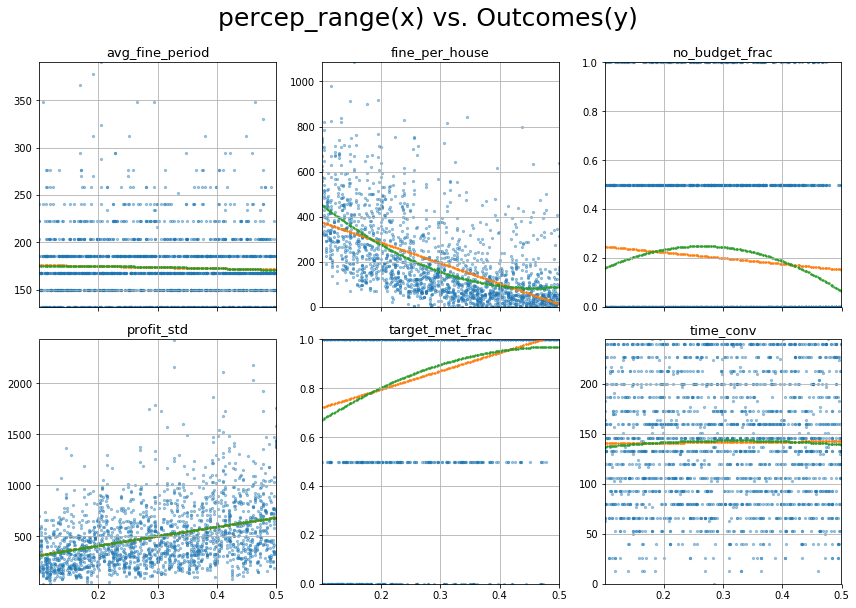

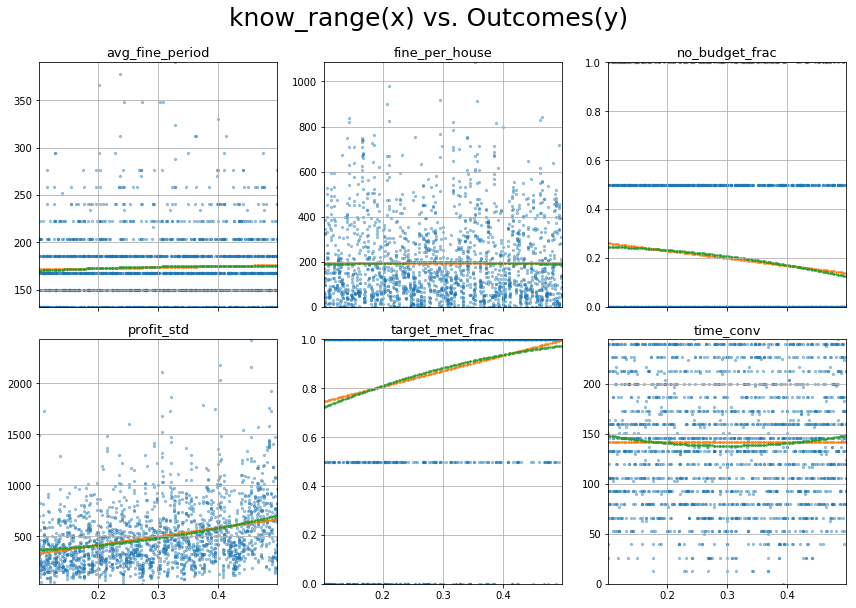

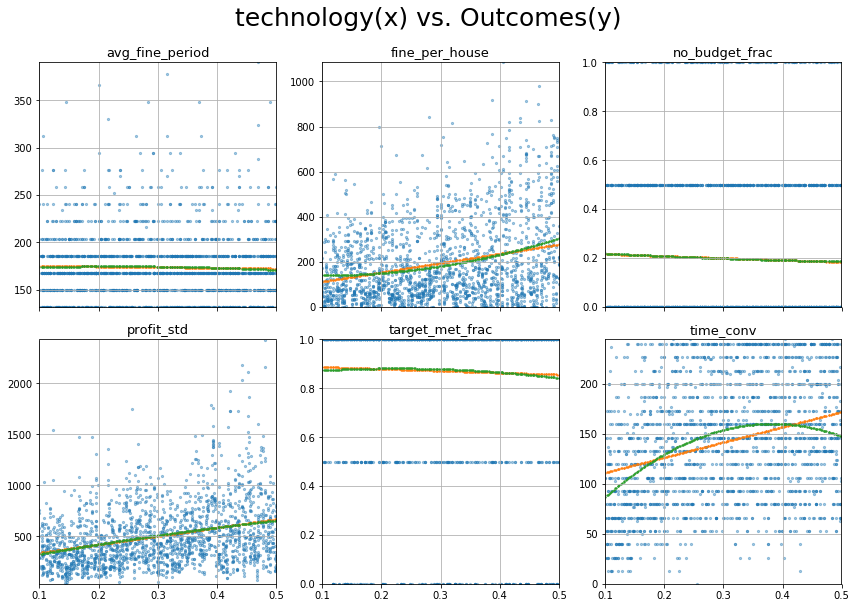

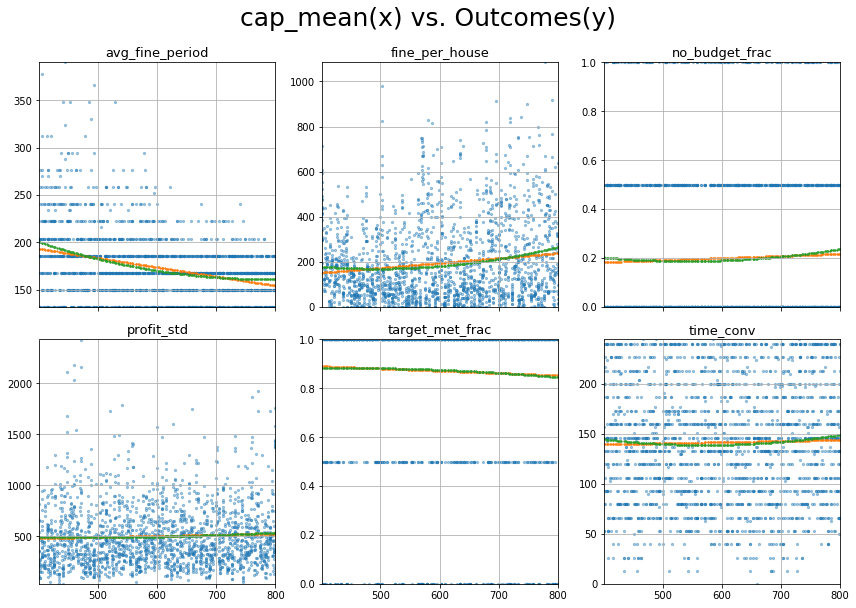

In [14]:
for i in range(inputs.shape[1]):
    plot_cont(inputs, outcomes, i)

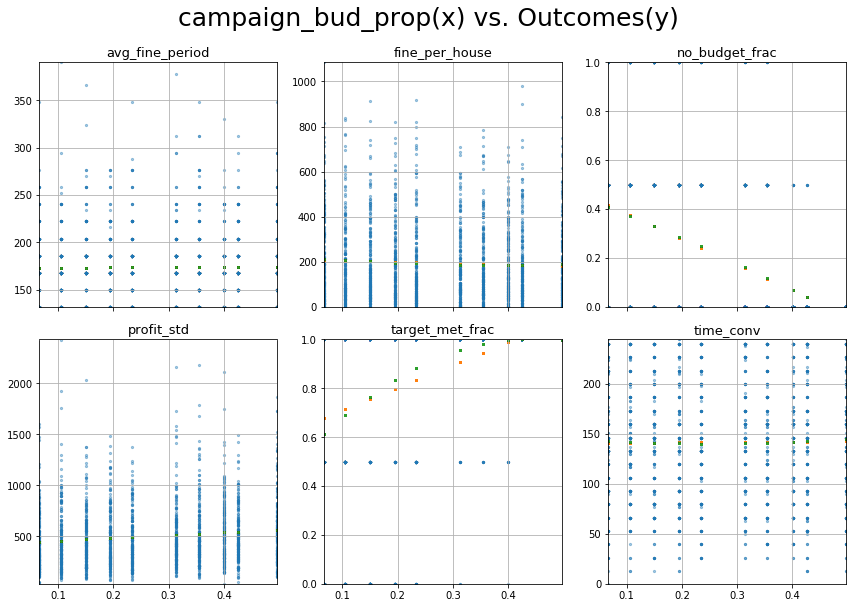

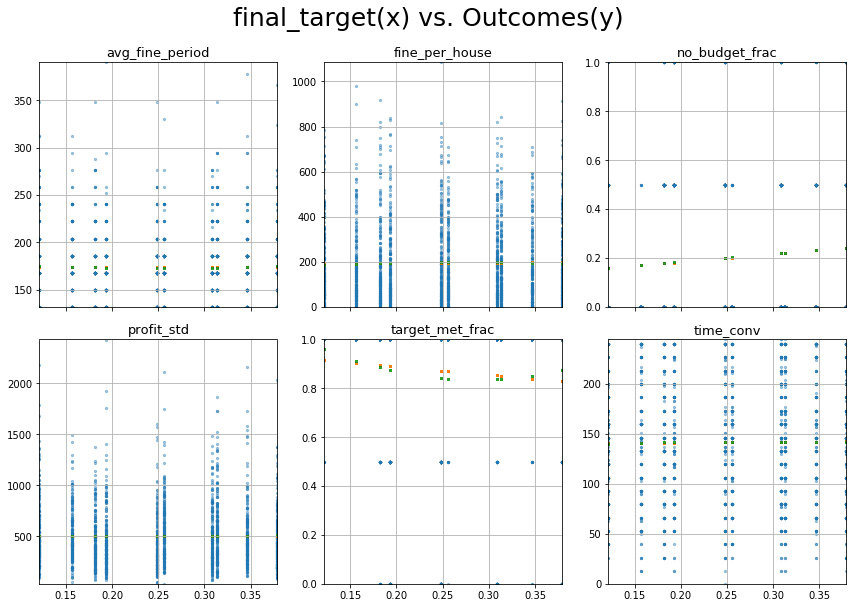

In [15]:
for i in range(solutions.shape[1]):
    plot_cont(solutions, outcomes, i)